In [130]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sb
sb.set_context('talk')


In [131]:
# recordemos que 1, 2, 3, 4 son los índices para la olla que contiene el
# agua, para el agua, pata la olla que contiene la leche condensada, para
# la leche condensada y para la temperatura ambiente de manera respectiva

# las siguientes cantidades estan en J (kg)^-1 K^-1
c_1 = 4120
c_2 = 4181.3
c_3 = c_1
c_4 = 3265.7 # promedio del de la mantequilla y el de la leche entera

# las siguientes cantidades están en kg
m_1 = 1
m_2 = 14
m_3 = 0.5
m_4 = 0.5

# lo que viene está en W m^-3 K^-1
h_12 = 1500
h_23 = h_12
h_34 = 500
h_15 = 300

#Lo que viene está en m^2
A_12 = 0.3
A_23 = 0.09
A_34 = 0.01
A_15 = 0.37

# la matriz A queda dada por

A = np.array([np.array([-(h_12 * A_12 + h_15 * A_15),          h_12 * A_12          ,               0              ,      0      , h_15 * A_15]) / (c_1 * m_1),
              np.array([      h_12 * A_12           ,   -(h_12 * A_12 + h_23 * A_23),         h_23 * A_23          ,      0      ,      0     ]) / (c_2 * m_2),
              np.array([           0                ,        h_23 * A_23            , -(h_23 * A_23 + h_34 * A_34 ), h_34 * A_34 ,      0     ]) / (c_3 * m_3),
              np.array([           0                ,              0                ,         h_34 * A_34          , -h_34 * A_34,      0     ]) / (c_4 * m_4),
                       [           0                ,              0                ,               0              ,      0      ,      0     ]])

B = np.array([[1]
             ,[0]
             ,[0]
             ,[0]
             ,[0]])

C = np.array([[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0]])


D = np.zeros((4,1))


x_0 = np.array([294.15, 291.15, 294.15, 285.15, 294.15])

alpha = 5;
Phi = 1;
U = alpha * Phi;

In [132]:
t = np.linspace(0, 60*60*3, 10000)
u = np.ones(10000) * U 
sys = signal.StateSpace(A,B,C,D)
t1, y1, s1 = signal.lsim(sys, u, t, x_0)

<IPython.core.display.Javascript object>


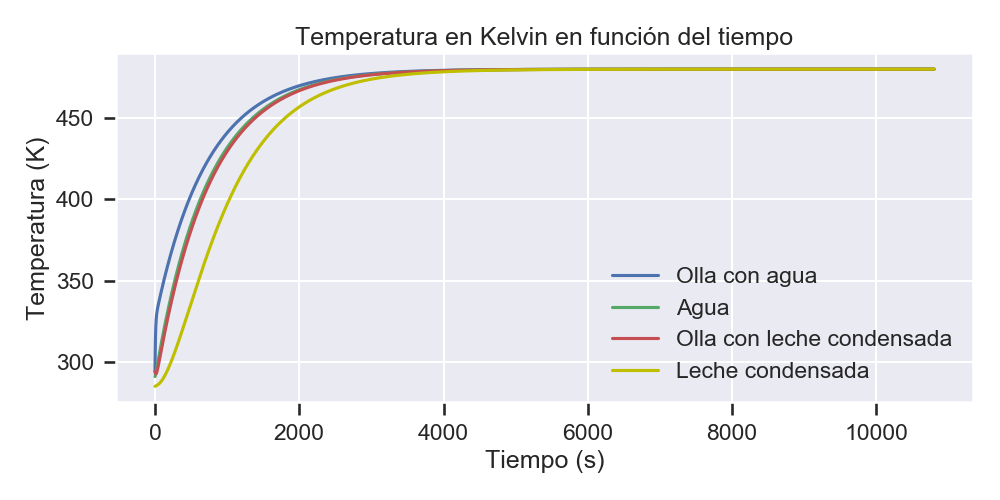

In [133]:
plt.figure(figsize=(10,5))
plt.plot(t, y1[:,0])
plt.plot(t1, y1[:,1])
plt.plot(t1, y1[:,2])
plt.plot(t1, y1[:,3], 'y')
plt.title('Temperatura en Kelvin en función del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend(['Olla con agua', 'Agua', 'Olla con leche condensada', 'Leche condensada'])
plt.tight_layout()
plt.savefig('plot1.png', dpi=300)